<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20221007.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* customer analysis
* iterator

In [4]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes 
from datetime import datetime, date, time, timezone, timedelta 
import matplotlib.pyplot as plt
import seaborn as sns 
import os
import re 

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from functools import reduce
from collections import defaultdict

# Customer analysis

In [5]:
os.listdir()

['.config',
 'online_retail_II.xlsx',
 'mall_customers.csv',
 'test.csv',
 '1_order_payments_dataset.csv',
 'scanner_data.csv',
 '1_customers_dataset.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'ecommerce-data.csv',
 '1_orders_dataset.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'sample_data']

In [6]:
df = pd.read_csv('mall_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.columns = [re.sub(' ', '_', re.sub(' \(.+\)$', '', a)).lower() for a in df.columns]
df.head()

,customerid,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


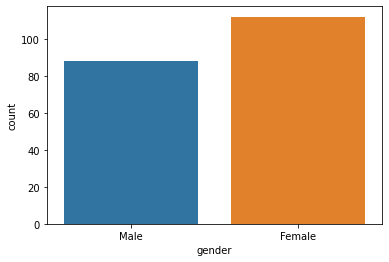

In [8]:
sns.countplot(data = df, x = 'gender')

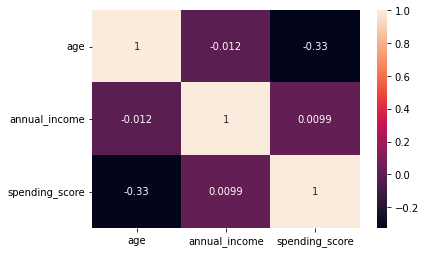

In [10]:
sns.heatmap(df.drop(['customerid'], axis = 1).corr(), annot = True)

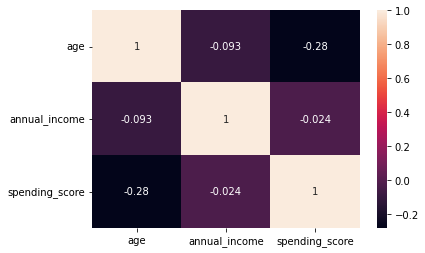

In [11]:
sns.heatmap(df[df.gender == 'Male'].drop(['customerid'], axis = 1).corr(), annot = True)

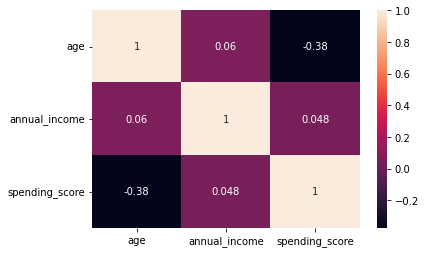

In [12]:
sns.heatmap(df[df.gender == 'Female'].drop(['customerid'], axis = 1).corr(), annot = True)

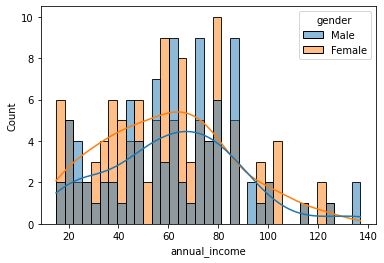

In [14]:
sns.histplot(data = df, x = 'annual_income', hue = 'gender', kde = True, bins = 35)

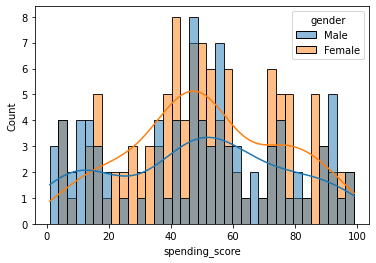

In [15]:
sns.histplot(data = df, x = 'spending_score', hue = 'gender', kde = True, bins = 35)

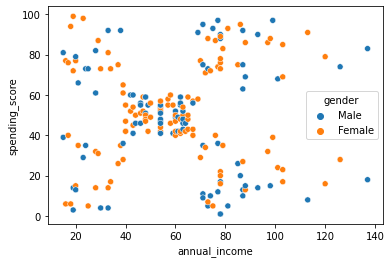

In [16]:
sns.scatterplot(data = df, x = 'annual_income', y = 'spending_score', hue = 'gender')

In [19]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df[['annual_income', 'spending_score']])

In [20]:
km = KMeans(n_clusters = 5, random_state = 10)
km.fit(df_std)
df['flag'] = km.fit_predict(df_std).astype(str)
df.head()

,customerid,gender,age,annual_income,spending_score,flag
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3


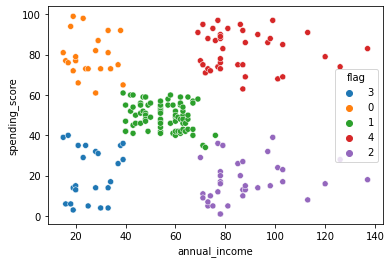

In [21]:
sns.scatterplot(data = df, x = 'annual_income', y = 'spending_score', hue = 'flag')

# Iterator

In [22]:
mat = [list('ABC'), list('DEF'), list('GHI')]
a = {letters : [r, c] for r, rows in enumerate(mat) for c, letters in enumerate(rows)}

arr = np.empty([3,3], dtype = 'object')
for k, v in a.items() :
  arr[v[0], v[1]] = k
arr

array([['A', 'B', 'C'],
       ['D', 'E', 'F'],
       ['G', 'H', 'I']], dtype=object)

In [29]:
names = np.random.choice(['kim', 'park', 'lee'], 100, replace = True)

def get_score(names) :  

  uniques, counts = np.unique(names, return_counts = True)
  workers = dict(zip( uniques, counts))
  
  res = list()

  for name, counts in workers.items() :

    m = np.random.normal(60, 20, 1)
    s = np.random.randint(1, 10, 1)
    score = [a if a <= 100 else 100 for a in np.random.normal(m, s, counts)]

    temp = pd.DataFrame({'name' : np.repeat(name, counts),
                         'score' : score
                         })
    res.append(temp)
  
  return pd.concat(res)

res = get_score(names)
res.head()

,name,score
0,kim,53.369833
1,kim,59.370711
2,kim,58.967931
3,kim,54.825421
4,kim,47.835721


In [30]:
res.groupby(['name']).agg({'score':['mean', 'std']})

score          
           mean       std
name                     
kim   54.953900  3.206783
lee   55.249402  4.268071
park  65.253812  0.893284

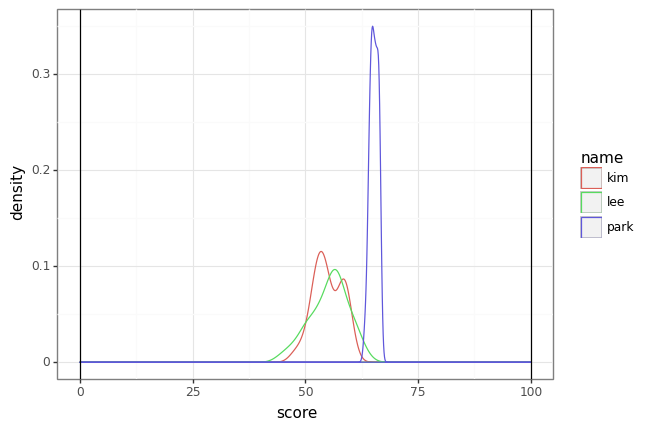

<ggplot: (8752569160881)>

In [32]:
(
    ggplot(res, aes('score', color = 'name')) + 
    gg.geom_density() +
    gg.geom_vline(xintercept = 0) +
    gg.geom_vline(xintercept = 100) +
    gg.theme_bw()
)